In [1]:
import torch
from torch import optim
import torchvision
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

batch_size = 100
trainset = MNIST('.', train=True, transform=transform, download=True)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

def imshow(img):
    img = torchvision.utils.make_grid(img)
    img = img / 2 + 0.5
    npimg = img.detach().numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

In [2]:
in_features = 1 * 28 * 28

class Discriminator(torch.nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_features, 384, bias=False)
        self.fc2 = torch.nn.Linear(384, 128, bias=False)
        self.fc3 = torch.nn.Linear(128, 1, bias=False)
        self.relu = torch.nn.LeakyReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # 0 to 1(0: fake, 1: true)
        return x

In [3]:
netD = Discriminator(in_features)

iterator = iter(trainloader)
img, _ = next(iterator)

D_out = netD(img.reshape(batch_size, -1))

print(D_out[0:5])

tensor([[0.4738],
        [0.5034],
        [0.5091],
        [0.4639],
        [0.5161]], grad_fn=<SliceBackward>)


In [4]:
zsize = 100

class Generator(torch.nn.Module):
    def __init__(self, zsize, in_features):
        super().__init__()
        self.fc1 = torch.nn.Linear(zsize, 256, bias=False)
        self.fc2 = torch.nn.Linear(256, 512, bias=False)
        self.fc3 = torch.nn.Linear(512, in_features, bias=False)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))  # -1 to 1
        return x

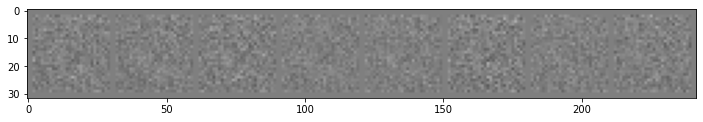

In [5]:
netG = Generator(zsize, in_features)

z = torch.randn(batch_size, zsize)

output = netG(z)

imshow(output[0:8].reshape(-1, 1, 28, 28))

In [6]:
G_out = netD(output)

print(G_out[0:5])

tensor([[0.4979],
        [0.5006],
        [0.4993],
        [0.4981],
        [0.4965]], grad_fn=<SliceBackward>)


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'using: {device}')

netD = Discriminator(in_features).to(device)
netG = Generator(zsize, in_features).to(device)

using: cuda


In [8]:
criterion = torch.nn.BCELoss().to(device)

one_labels = torch.ones(batch_size).to(device)
zero_labels = torch.zeros(batch_size).to(device)

optimizer_netD = optim.Adam(netD.parameters(), lr=0.0002, betas=[0.5, 0.999])
optimizer_netG = optim.Adam(netG.parameters(), lr=0.0002, betas=[0.5, 0.999])

epoch: 1, netD loss: 1.1414661407470703, netG loss: 0.7955173254013062
epoch: 2, netD loss: 1.006940484046936, netG loss: 0.7513911724090576
epoch: 3, netD loss: 0.9698638319969177, netG loss: 0.7252681255340576
epoch: 4, netD loss: 0.9795132875442505, netG loss: 0.6941505074501038
epoch: 5, netD loss: 0.9905452728271484, netG loss: 0.6912662386894226
epoch: 6, netD loss: 1.036778450012207, netG loss: 0.6708375811576843
epoch: 7, netD loss: 1.0401611328125, netG loss: 0.6674897074699402
epoch: 8, netD loss: 1.0514165163040161, netG loss: 0.6640987396240234
epoch: 9, netD loss: 1.0521160364151, netG loss: 0.6630253195762634
epoch: 10, netD loss: 1.06059992313385, netG loss: 0.6562318205833435


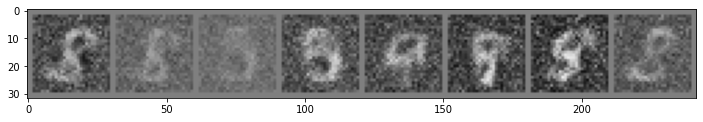

epoch: 11, netD loss: 1.0709927082061768, netG loss: 0.6649565696716309
epoch: 12, netD loss: 1.0894004106521606, netG loss: 0.651193380355835
epoch: 13, netD loss: 1.0902901887893677, netG loss: 0.6548818349838257
epoch: 14, netD loss: 1.0803221464157104, netG loss: 0.660966157913208
epoch: 15, netD loss: 1.0958865880966187, netG loss: 0.6506738066673279
epoch: 16, netD loss: 1.0856715440750122, netG loss: 0.6596131324768066
epoch: 17, netD loss: 1.0751181840896606, netG loss: 0.6541518568992615
epoch: 18, netD loss: 1.0709694623947144, netG loss: 0.6496852040290833
epoch: 19, netD loss: 1.081966519355774, netG loss: 0.6479172706604004
epoch: 20, netD loss: 1.0802702903747559, netG loss: 0.6562249660491943


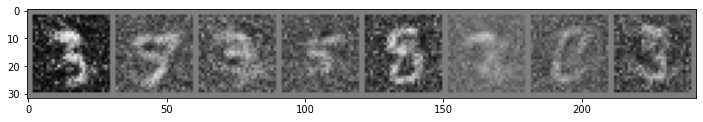

epoch: 21, netD loss: 1.0919028520584106, netG loss: 0.6513598561286926
epoch: 22, netD loss: 1.077779769897461, netG loss: 0.6551352143287659
epoch: 23, netD loss: 1.079115390777588, netG loss: 0.6555920839309692
epoch: 24, netD loss: 1.0771968364715576, netG loss: 0.6514764428138733
epoch: 25, netD loss: 1.0657843351364136, netG loss: 0.6575663685798645
epoch: 26, netD loss: 1.0605108737945557, netG loss: 0.6599453687667847
epoch: 27, netD loss: 1.0655022859573364, netG loss: 0.6550084948539734
epoch: 28, netD loss: 1.051698923110962, netG loss: 0.6588364839553833
epoch: 29, netD loss: 1.039801836013794, netG loss: 0.6619508266448975
epoch: 30, netD loss: 1.0393325090408325, netG loss: 0.6599600315093994


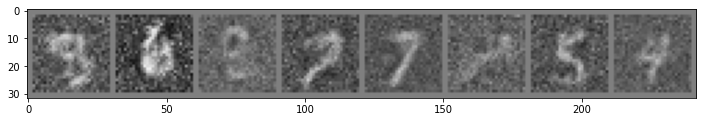

epoch: 31, netD loss: 1.0410510301589966, netG loss: 0.658452570438385
epoch: 32, netD loss: 1.0355122089385986, netG loss: 0.6638789176940918
epoch: 33, netD loss: 1.02446711063385, netG loss: 0.6668489575386047
epoch: 34, netD loss: 1.0154458284378052, netG loss: 0.6643710732460022
epoch: 35, netD loss: 1.0163726806640625, netG loss: 0.6640302538871765
epoch: 36, netD loss: 1.0048810243606567, netG loss: 0.6684220433235168
epoch: 37, netD loss: 1.006507396697998, netG loss: 0.6656423211097717
epoch: 38, netD loss: 0.9982932806015015, netG loss: 0.6770976185798645
epoch: 39, netD loss: 0.9940985441207886, netG loss: 0.6720184087753296
epoch: 40, netD loss: 0.9888044595718384, netG loss: 0.675533652305603


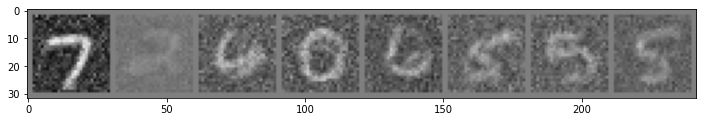

epoch: 41, netD loss: 0.9817067980766296, netG loss: 0.677280604839325
epoch: 42, netD loss: 0.9775905609130859, netG loss: 0.6735815405845642
epoch: 43, netD loss: 0.9721415638923645, netG loss: 0.6708363890647888
epoch: 44, netD loss: 0.9739569425582886, netG loss: 0.672346830368042
epoch: 45, netD loss: 0.9610726237297058, netG loss: 0.6792080402374268
epoch: 46, netD loss: 0.9604315161705017, netG loss: 0.6767882108688354
epoch: 47, netD loss: 0.9595287442207336, netG loss: 0.6745766401290894
epoch: 48, netD loss: 0.9564645886421204, netG loss: 0.6732478141784668
epoch: 49, netD loss: 0.9583702087402344, netG loss: 0.676182210445404
epoch: 50, netD loss: 0.9591514468193054, netG loss: 0.6768522262573242


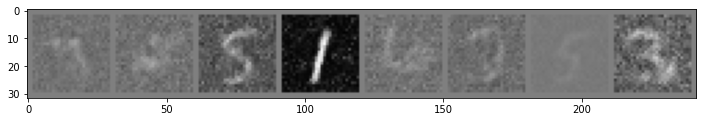

In [9]:
losses_netD = []
losses_netG = []
EPOCHS = 50

for epoch in range(1, EPOCHS+1):
    running_loss_netD = 0.0
    running_loss_netG = 0.0
    for count, (real_imgs, _) in enumerate(trainloader, 1):
        netD.zero_grad()

        # 識別器の学習
        real_imgs = real_imgs.to(device)

        # データローダーからデータを読み込み、識別器に入力し、損失を計算
        output_real_imgs = netD(real_imgs.reshape(batch_size, -1))
        output_real_imgs = output_real_imgs.reshape(batch_size)
        loss_real_imgs = criterion(output_real_imgs, one_labels)
        loss_real_imgs.backward()

        # 生成器から得たデータを、識別器に入力し、損失を計算
        z = torch.randn(batch_size, zsize).to(device)
        fake_imgs = netG(z)
        output_fake_imgs = netD(fake_imgs.detach()).reshape(batch_size)
        loss_fake_imgs = criterion(output_fake_imgs, zero_labels)
        loss_fake_imgs.backward()

        # それらをまとめたものが最終的な損失
        loss_netD = loss_real_imgs + loss_fake_imgs
        optimizer_netD.step()
        running_loss_netD += loss_netD

        # 生成器の学習
        netG.zero_grad()
        z = torch.randn(batch_size, zsize).to(device)
        fake_imgs = netG(z)
        output_fake_imgs = netD(fake_imgs).reshape(batch_size)
        loss_netG = criterion(output_fake_imgs, one_labels)
        loss_netG.backward()
        optimizer_netG.step()
        running_loss_netG += loss_netG

    running_loss_netD /= count
    running_loss_netG /= count
    print(f'epoch: {epoch}, netD loss: {running_loss_netD}, netG loss: {running_loss_netG}')
    losses_netD.append(running_loss_netD.cpu())
    losses_netG.append(running_loss_netG.cpu())
    if epoch % 10 == 0:
        z = torch.randn(batch_size, zsize).to(device)
        generated_imgs = netG(z).cpu()
        imshow(generated_imgs[0:8].reshape(8, 1, 28, 28))